## Imports

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Read data

In [12]:
df = pd.read_json('../../data/raw/human.jsonl', lines=True)

## Article topic extraction

In [13]:
def extract_topic(id):
    try:
        dash_indices = [i for i, char in enumerate(id) if char == '-']
        second_last_dash_index = dash_indices[-2]
        last_slash_index = id.rindex('/')
        
        # Extract the text between the second-to-last "-" and the last "/"
        result = id[second_last_dash_index + 1:last_slash_index]
        return result
    except ValueError:
        # In case "-" or "/" are not found, return None
        return None

In [15]:
df['topic'] = df['id'].apply(extract_topic)
df['topic'].unique().size

24

## Build bar chart

In [34]:
x = df['topic'].unique()

x.sort()
# Generated by ChatGPT based on sorted x
x_human_readable = [
        'Biden Inauguration', 'Capitol Riot', 'Citibank $500 Million Mistake', 'CNN Chris Cuomo', 
        'Colin Powell Dead', 'Colonial Pipeline Hack', 'COVID-19', 'Ever Given Suez Canal', 
        'Facebook Outage', 'George Floyd Derek Chauvin Trial', 'Harry and Meghan', 'Hurricane Ida', 
        'Kabul Airport Attack', 'Kamala Harris Vice President', 'Kyle Rittenhouse Not Guilty', 
        'Michigan High School Shooting', 'Rust Movie Set Shooting', 'Stimulus Check', 
        'Tiger Woods Accident', 'Tom Brady Super Bowl', 'Trump Impeachment', 'Twitter Bans Trump', 
        'Winter Storm Texas', 'Wyoming Gabby Petito'
    ]
print(x)
y = [0] * len(x)
for i, topic in enumerate(x):
    y[i] = y[i] + (df.topic == topic).sum()

['bideninauguration' 'capitolriot' 'citibank500millionmistake'
 'cnnchriscuomo' 'colinpowelldead' 'colonialpipelinehack' 'covid19'
 'evergreensuezcanal' 'facebookoutage' 'georgefloydderekchauvin'
 'harryandmeghan' 'hurricaneida' 'kabulairportattack'
 'kamalaharrisvicepresident' 'kylerittenhousenotguilty'
 'michiganhighschoolshooting' 'rustmoviesetshooting' 'stimuluscheck'
 'tigerwoodsaccident' 'tombradysuperbowl' 'trumpimpeachment'
 'twitterbanstrump' 'winterstormtexas' 'wyominggabbypetito']


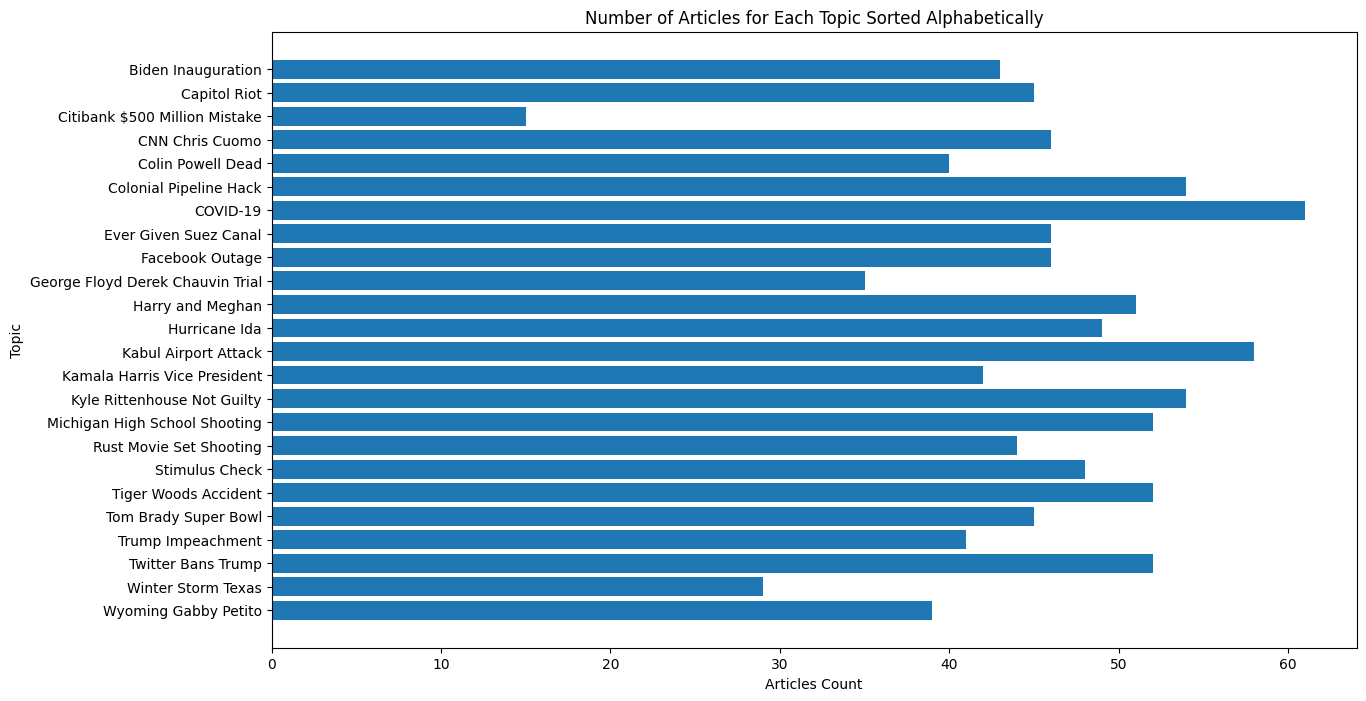

In [63]:
plt.figure(figsize=(14, 8))
plt.barh(x_human_readable, y)
plt.xlabel('Articles Count')
plt.ylabel('Topic')
plt.title('Number of Articles for Each Topic Sorted Alphabetically')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest count at the top
plt.show()

In [21]:
topic_to_group = {
    'bideninauguration': 'political-events',
    'capitolriot': 'political-events',
    'kamalaharrisvicepresident': 'political-events',
    'trumpimpeachment': 'political-events',
    'twitterbanstrump': 'political-events',
    'colinpowelldead': 'political-events',
    'kylerittenhousenotguilty': 'crime-legal',
    'michiganhighschoolshooting': 'crime-legal',
    'rustmoviesetshooting': 'crime-legal',
    'wyominggabbypetito': 'crime-legal',
    'georgefloydderekchauvin': 'crime-legal',
    'cnnchriscuomo': 'crime-legal',
    'colonialpipelinehack': 'disasters-accidents',
    'hurricaneida': 'disasters-accidents',
    'tigerwoodsaccident': 'disasters-accidents',
    'winterstormtexas': 'disasters-accidents',
    'evergreensuezcanal': 'disasters-accidents',
    'covid19': 'health-economy',
    'stimuluscheck': 'health-economy',
    'citibank500millionmistake': 'health-economy',
    'harryandmeghan': 'social-cultural-tech',
    'tombradysuperbowl': 'social-cultural-tech',
    'facebookoutage': 'social-cultural-tech'
}

group_to_topics = {
    "political-events": [
        'bideninauguration',
        'capitolriot',
        'kamalaharrisvicepresident',
        'trumpimpeachment',
        'twitterbanstrump',
        'colinpowelldead'
    ],
    "crime-legal": [
        'kylerittenhousenotguilty',
        'michiganhighschoolshooting',
        'rustmoviesetshooting',
        'wyominggabbypetito',
        'georgefloydderekchauvin',
        'cnnchriscuomo'
    ],
    "disasters-accidents": [
        'colonialpipelinehack',
        'hurricaneida',
        'tigerwoodsaccident',
        'winterstormtexas',
        'evergreensuezcanal'
    ],
    "health-economy": [
        'covid19',
        'stimuluscheck',
        'citibank500millionmistake'
    ],
    "social-cultural-tech": [
        'harryandmeghan',
        'tombradysuperbowl',
        'facebookoutage'
    ]
}

topic_human_readable = {
    'bideninauguration': 'Biden Inauguration',
    'capitolriot': 'Capitol Riot',
    'citibank500millionmistake': 'Citibank $500 Million Mistake',
    'cnnchriscuomo': 'CNN Chris Cuomo',
    'colinpowelldead': 'Colin Powell Dead',
    'colonialpipelinehack': 'Colonial Pipeline Hack',
    'covid19': 'COVID-19',
    'evergreensuezcanal': 'Ever Given Suez Canal',
    'facebookoutage': 'Facebook Outage',
    'georgefloydderekchauvin': 'George Floyd Derek Chauvin Trial',
    'harryandmeghan': 'Harry and Meghan',
    'hurricaneida': 'Hurricane Ida',
    'kabulairportattack': 'Kabul Airport Attack',
    'kamalaharrisvicepresident': 'Kamala Harris Vice President',
    'kylerittenhousenotguilty': 'Kyle Rittenhouse Not Guilty',
    'michiganhighschoolshooting': 'Michigan High School Shooting',
    'rustmoviesetshooting': 'Rust Movie Set Shooting',
    'stimuluscheck': 'Stimulus Check',
    'tigerwoodsaccident': 'Tiger Woods Accident',
    'tombradysuperbowl': 'Tom Brady Super Bowl',
    'trumpimpeachment': 'Trump Impeachment',
    'twitterbanstrump': 'Twitter Bans Trump',
    'winterstormtexas': 'Winter Storm Texas',
    'wyominggabbypetito': 'Wyoming Gabby Petito'
}

C:\Users\boyan.bogdanov\AppData\Local\Temp\ipykernel_25984\3333174602.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = plt.cm.get_cmap('prism', len(grouped_df['group'].unique()))


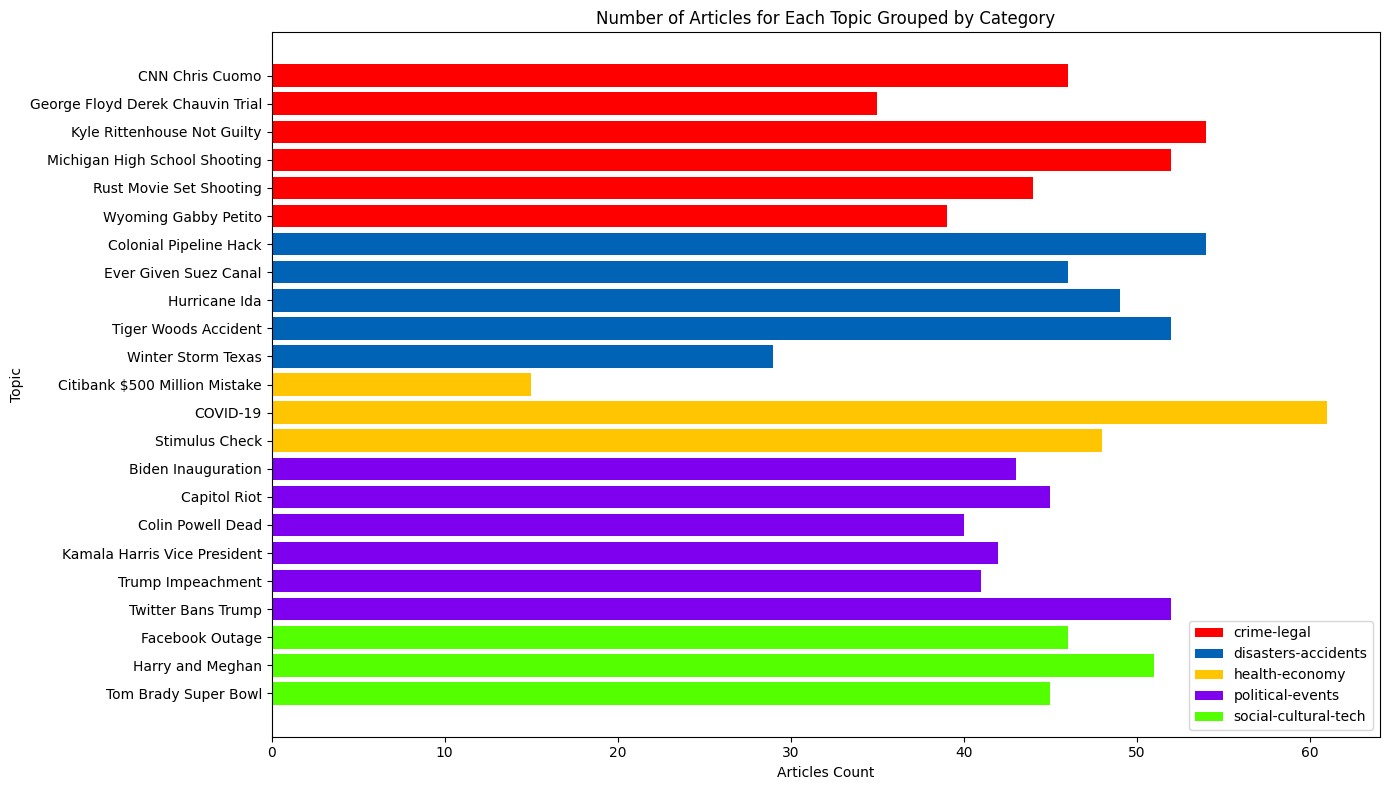

In [32]:
df['group'] = df['topic'].map(topic_to_group)

# Aggregate counts by group and topic
grouped_df = df.groupby(['group', 'topic']).size().reset_index(name='count')

# Create the segmented bar chart
plt.figure(figsize=(14, 8))

# Initialize a color map for consistent coloring of bars within each group
color_map = plt.cm.get_cmap('prism', len(grouped_df['group'].unique()))

# Plot each group's bars
for i, (group, data) in enumerate(grouped_df.groupby('group')):
    topics = data['topic'].apply(lambda x: topic_human_readable[x]).tolist()
    counts = data['count'].tolist()
    bars = plt.barh(topics, counts, color=color_map(i), label=group)

# Add labels, title, and legend
plt.xlabel('Articles Count')
plt.ylabel('Topic')
plt.title('Number of Articles for Each Topic Grouped by Category')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest count at the top
plt.legend()

plt.tight_layout()
plt.show()